In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species']) #just make the classification of species on basis of labels

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
X = df.iloc[:,0:2] # we will take 0 to 2
y = df.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [26]:
clf = LogisticRegression(multi_class='multinomial') # it will use softmax when explicitly defining multi_class='multinomial'

In [27]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [29]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)) #predication score it's bad

0.7666666666666667


In [31]:
pd.DataFrame(confusion_matrix(y_test,y_pred)) #check were it's getting wrong

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [32]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.80994083e-01, 1.87535896e-02, 2.52327111e-04]])

In [33]:
clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


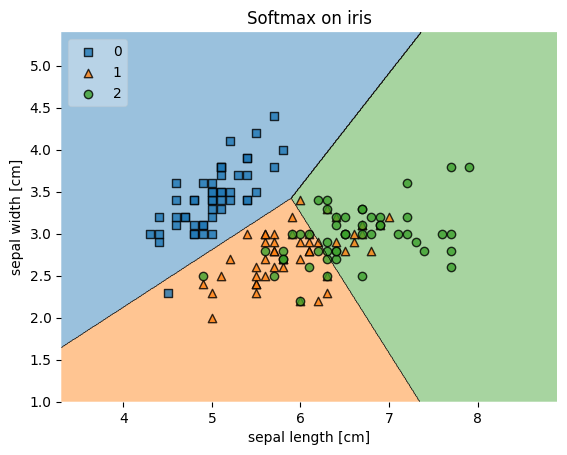

In [35]:
from mlxtend.plotting import  plot_decision_regions
plot_decision_regions(X.values,y.values,clf=clf,legend=2)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.title('Softmax on iris')
plt.show()